<a href="https://colab.research.google.com/github/fernandomarca/IA/blob/main/YOLOv4_Treinamento_do_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv4 - Local

Para realizar o treinamento é necessário que você primeiro tenha coletado as imagens do conjunto de treinamento e criado o seu dataset

Só lembrando que o conjunto de imagens para fazer o treinamento do detector customizado do YOLO deve conter:

* Imagens dos objetos que queremos reconhecer, já catalogadas (com os arquivos annotation)
* Arquivos obj.data e obj.names 
* Arquivo .cfg customizado
* Arquivo train.txt (test.txt é opcional)

Se estiver com todos esses arquivos tudo ok então pode continuar executando as etapas desse Colab.

# Instalando o OpenCv

In [ ]:
!pip install -r requirements.txt

In [ ]:
!conda install -c -y conda-forge opencv

In [56]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

## Etapa 1 - Conectando com o Google Drive

## Etapa 2 - Download do Darknet

Primeiramente vamos clonar o repositório do darknet (por AlexeyAB, o mais atualizado atualmente), que contém todos os arquivos e ferramentas necessárias para fazer o treinamento do modelo.

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd darknet
!ls

## Etapa 3 - Compilando a biblioteca

Para compilar com suporte a GPU/CUDA iremos modificar o arquivo Makefile para definir algumas variáveis como ativado (de 0 para 1) -> OPENCV, GPU e CUDNN. Ao invés de abrir o arquivo em um editor de texto podemos fazer essa alteração com o comando `sed`.

In [23]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

## Etapa 4 - Preparando o YOLO

### 4.1 - Baixando os pesos do modelo pré-treinado 

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [24]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov4.weights
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


### 4.2 - Testando o detector

In [60]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg

 GPU isn't used 
 OpenCV version: 4.5.4
Couldn't open file: demo


In [ ]:
!conda install -c -y conda-forge matplotlib

### 4.3 Exibindo o resultado

In [ ]:
import cv2
import matplotlib.pyplot as plt

def mostrar(caminho):
  img = cv2.imread(caminho)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
mostrar("predictions.jpg")

## Etapa 5 - Enviando o dataset customizado para o seu Cloud VM (Colab)


### Copiando o conjunto de imagens de treinamento

In [31]:
pwd

'/home/fernando/Documentos/GitHub/IA-expert/IA/darknet'

In [ ]:
!unzip /yolo/recursos/obj.zip -d ./data/

### Copiando o conjunto de imagens de validação

In [ ]:
!unzip /yolo/recursos/valid.zip -d ./data/

### Copiando os arquivos de configurações de treinamento

In [ ]:
!cp /yolo/recursos/yolov4_custom.cfg ./cfg
!cp /yolo/recursos/obj.names ./data
!cp /yolo/recursos/obj.data ./data
!cp /yolo/recursos/train.txt ./data
!cp /yolo/recursos/test.txt ./data

## Etapa 6 - Baixando os pesos pré-treinados das camadas convolucionais

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
ls

3rdparty/               darknet.py              obj/
backup/                 darknet_video.py        predictions.jpg
build/                  data/                   README.md
build.ps1*              image_yolov3.sh*        results/
build.sh*               image_yolov4.sh*        scripts/
cfg/                    include/                src/
cmake/                  json_mjpeg_streams.sh*  video_yolov3.sh*
CMakeLists.txt          LICENSE                 video_yolov4.sh*
darknet*                Makefile                yolov4.conv.137
DarknetConfig.cmake.in  net_cam_v3.sh*          yolov4.weights
darknet_images.py       net_cam_v4.sh*


## Etapa 7 - Realizando o treinamento do modelo

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4_custom.cfg yolov4.conv.137 -dont_show -map

**Dica:** o treinamento pode demorar várias horas dependendo da configuração escolhida, então caso não esteja com essa página aberta durante esse tempo todo o Colab pode desconectar devido a inatividade (geralmente quando fica mais de 30 minutos inativo). Para evitar que isso aconteça, aperte Ctrl+Shift+I (ou F12) para abrir da janela de Inspecionar Elemento e cole o código javascript abaixo em seu console:

```
function ConnectButton(){
    console.log("Conectado"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
```
O que esse código faz é simular o click de um botão na página a cada 10 minutos, assim não é desconectado por inatividade.

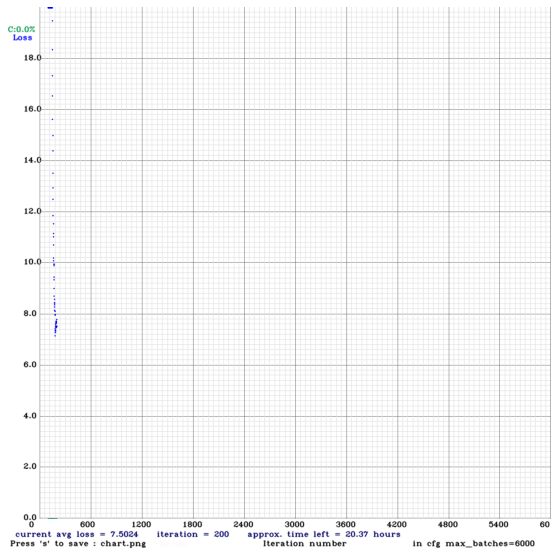

In [ ]:
mostrar('chart.png')

# Continuando o treinamento

In [ ]:
# 2000 * numero_classes
2000 * 3

6000

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4_custom.cfg /yolo/recursos/yolov4_custom_last.weights -dont_show -map

# Verificando o mAP (Mean Average Precision) do modelo 

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4_custom.cfg /yolo/recursos/yolov4_custom_last.weights

In [ ]:
!./darknet detector map /yolo/treinamento/obj.data /yolo/treinamento/yolov4_custom.cfg /yolo/treinamento/yolov4_custom_4000_best.weights

# Testando o modelo treinado

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_custom.cfg /yolo/recursos/yolov4_custom_last.weights /yolo/imagens/img-canecas.jpg -thresh 0.001

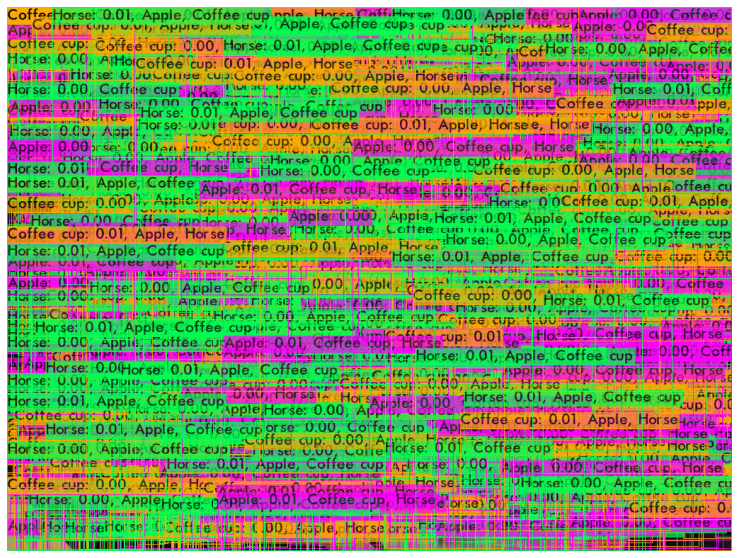

In [ ]:
mostrar('predictions.jpg')

In [ ]:
!./darknet detector test /yolo/treinamento/obj.data /yolo/treinamento/yolov4_custom.cfg /yolo/treinamento/yolov4_custom_4000_best.weights /yolo/imagens/img-canecas.jpg

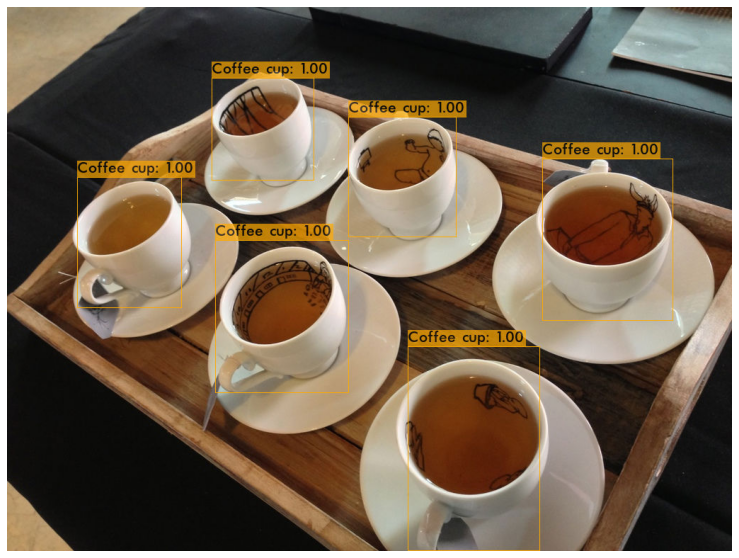

In [ ]:
mostrar('predictions.jpg')

In [ ]:
!./darknet detector test /yolo/treinamento/obj.data /yolo/treinamento/yolov4_custom.cfg /yolo/treinamento/yolov4_custom_4000_best.weights /yolo/imagens/apple.jpg

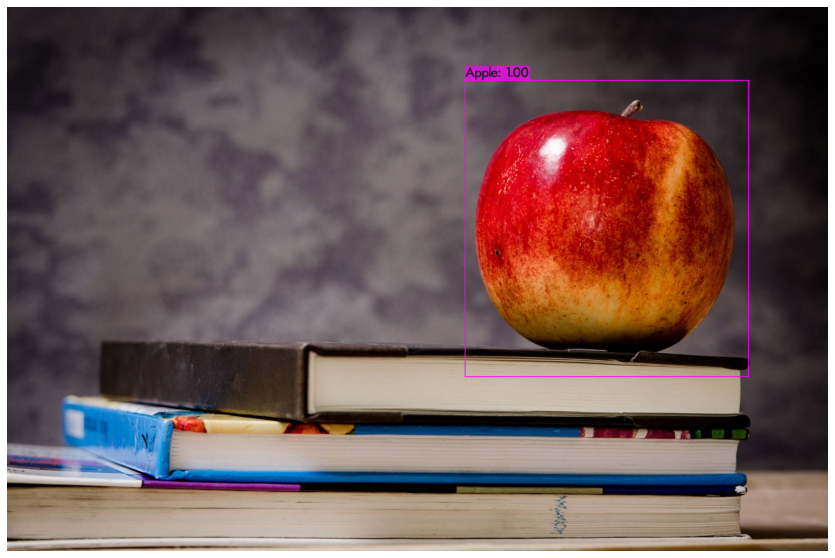

In [ ]:
mostrar('predictions.jpg')

In [ ]:
!./darknet detector test /yolo/treinamento/obj.data /yolo/treinamento/yolov4_custom.cfg /yolo/treinamento/yolov4_custom_4000_best.weights /content/darknet/data/horses.jpg

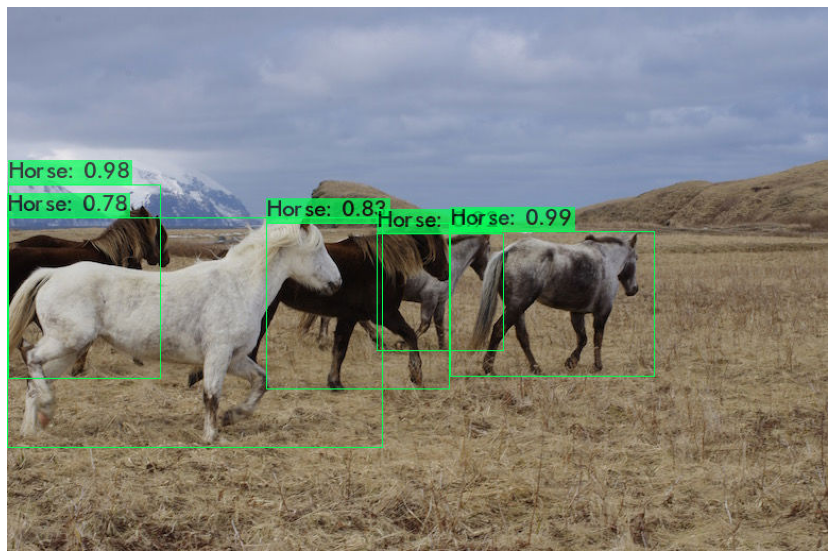

In [ ]:
mostrar('predictions.jpg')

# Finalizando - o seu detector está pronto para ser utilizado!